## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.shape

(4340, 8)

In [4]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
for features in df.columns[4:]:
    print(df[features].unique())
    


['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
#checking null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## Data Preprocessing


In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
#Dropping non useful features
data = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]


In [10]:
#Changing the temporal variable feature i.e year into numerical data feature
data['current_year'] = 2021
data['No_of_Year'] = data['current_year'] - data['year']

In [11]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,No_of_Year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [12]:
data.drop(['year'], axis=1, inplace=True)
data.drop(['current_year'], axis=1, inplace=True)

In [13]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,No_of_Year
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [14]:
data = pd.get_dummies(data, drop_first=True)

In [15]:
data.columns

Index(['selling_price', 'km_driven', 'No_of_Year', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [16]:
data.head()

,selling_price,km_driven,No_of_Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [17]:
data.corr()

,selling_price,km_driven,No_of_Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
No_of_Year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


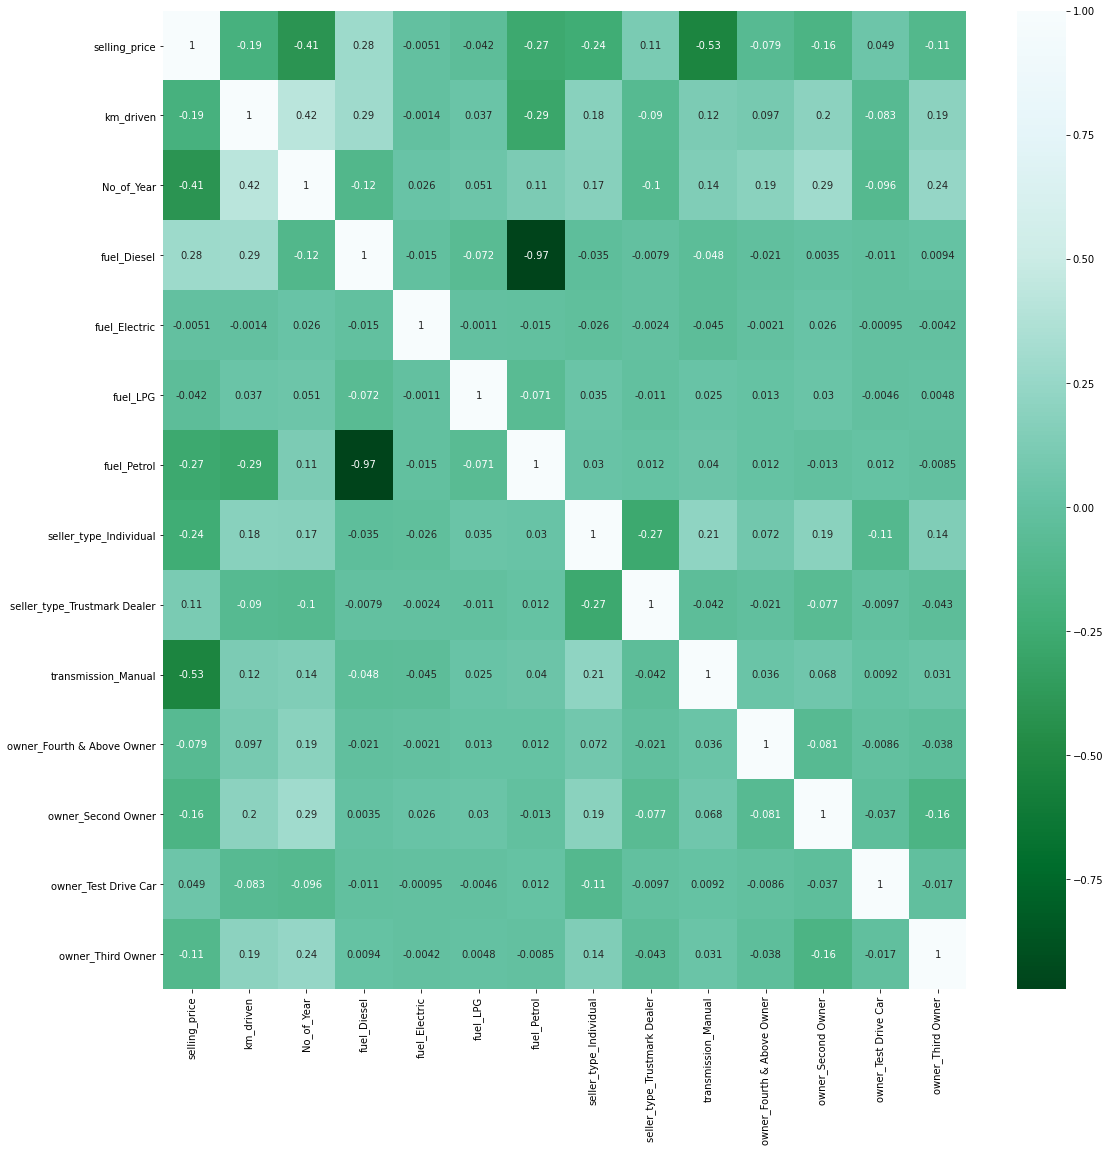

In [18]:
corr_mat = data.corr()
#getring correlations of each features in dataset
top_corr_featurs = corr_mat.index
plt.figure(figsize = (18,18))
g = sns.heatmap(data[top_corr_featurs].corr(),annot = True , cmap = "BuGn_r")  

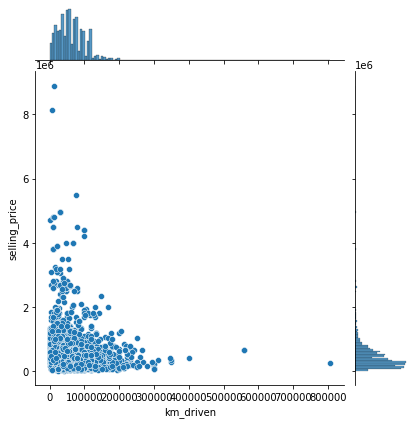

In [19]:
sns.jointplot(x='km_driven',y='selling_price',data=data, kind='scatter')

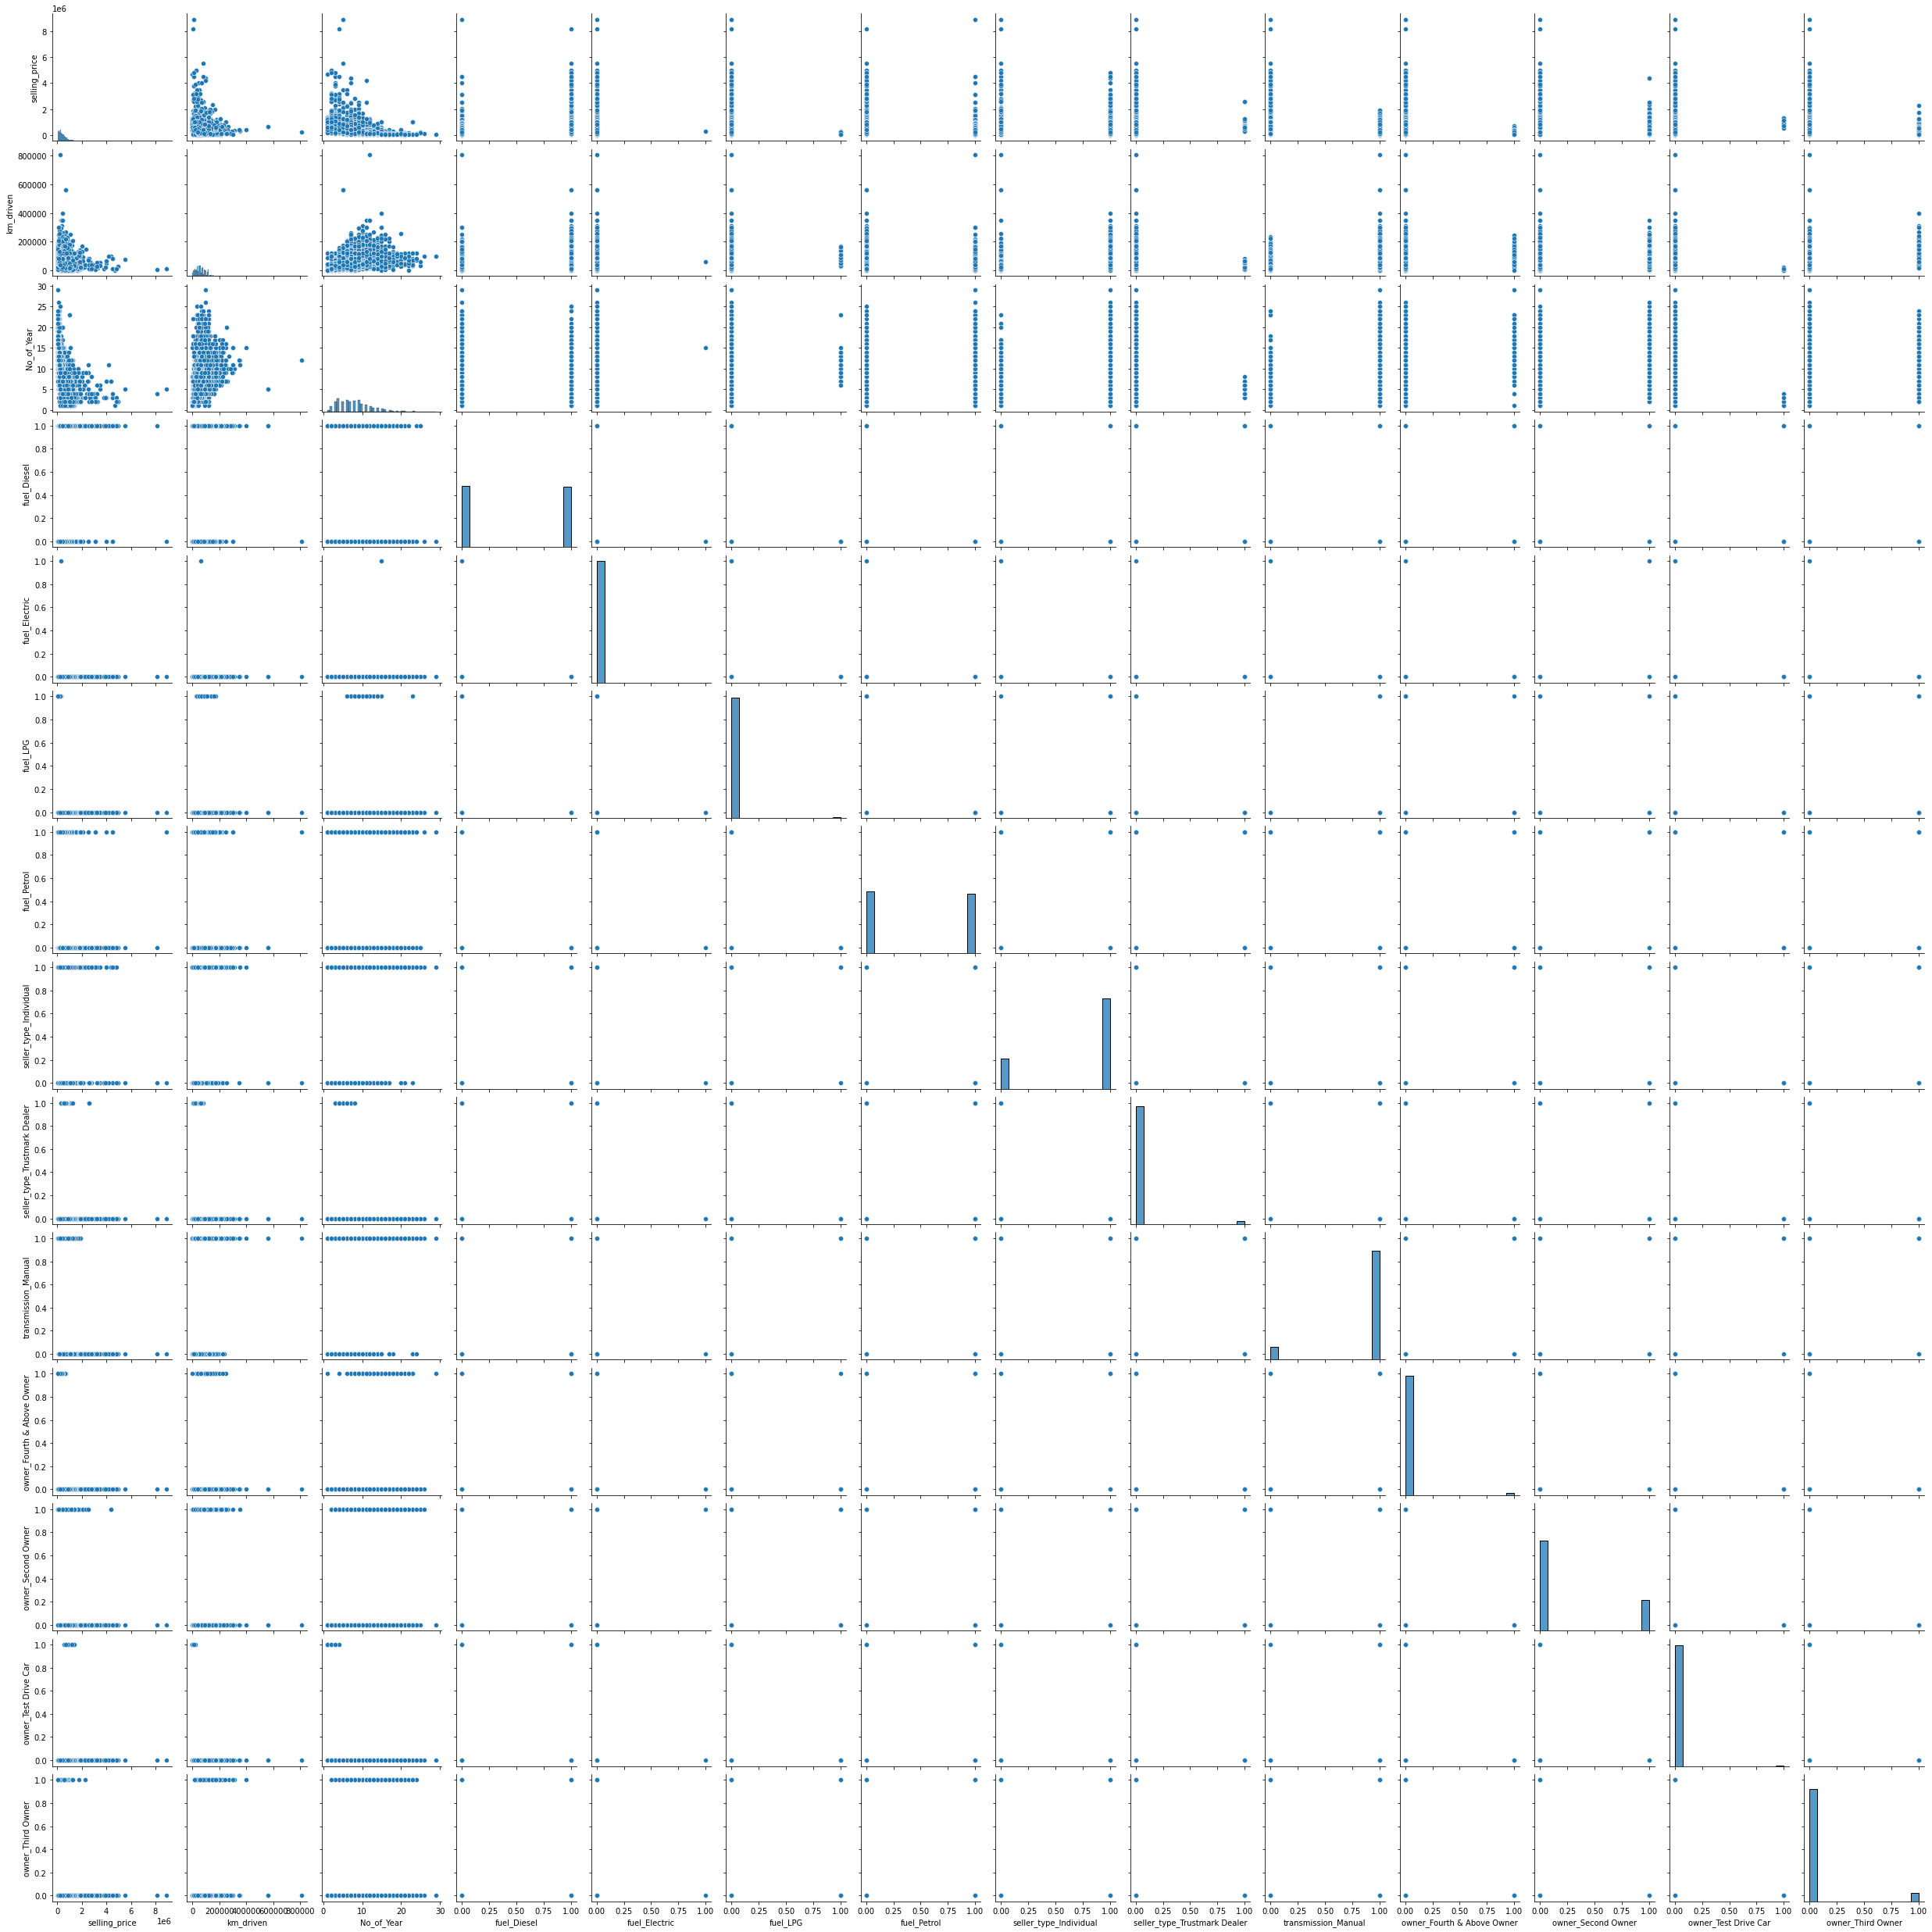

In [20]:
sns.pairplot(data)

## Splitting the dataset into dependent and independent features

In [21]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [22]:
X.head(10)

,km_driven,No_of_Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,1,0,0
5,125000,14,0,0,0,1,1,0,1,0,0,0,0
6,25000,5,0,0,0,1,1,0,1,0,0,0,0
7,60000,7,0,0,0,1,1,0,1,0,1,0,0
8,25000,6,0,0,0,1,1,0,1,0,0,0,0
9,78000,4,0,0,0,0,1,0,1,0,0,0,0


In [23]:
y.head(10)

0     60000
1    135000
2    600000
3    250000
4    450000
5    140000
6    550000
7    240000
8    850000
9    365000
Name: selling_price, dtype: int64

### Feature Importance

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[2.45345986e-01 2.48938729e-01 1.30368201e-01 8.59270717e-05
 2.39252619e-05 1.99303083e-04 4.63974394e-02 8.33175355e-03
 2.92828758e-01 7.54581596e-04 2.16174662e-02 1.00193659e-03
 4.10599365e-03]


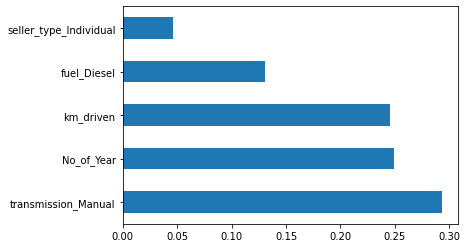

In [26]:
#plotting  graph of feature importances for better visualization
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh')
plt.show()

## Splitting the data into training and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

## Training the model

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
regressor=RandomForestRegressor()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200],
                'max_features': ['auto', 'sqrt']}

In [31]:
rf_regressor = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)


In [32]:
rf_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................max_features=sqrt, n_estimators=500; total time=   3.0s
[CV] END ................max_features=sqrt, n_estimators=500; total time=   2.6s
[CV] END ................max_features=sqrt, n_estimators=500; total time=   3.0s
[CV] END ................max_features=sqrt, n_estimators=500; total time=   2.6s
[CV] END ................max_features=sqrt, n_estimators=500; total time=   2.5s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ................max_features=sqrt, n_estimators=400; total time=   2.1s
[CV] END ................max_features=sqrt, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [33]:
rf_regressor.best_params_

{'n_estimators': 500, 'max_features': 'sqrt'}

In [34]:
y_pred = rf_regressor.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
print("r2_score:")
r2_score(y_test, y_pred)

r2_score:


0.8577720451122911

In [37]:
import pickle
file = open('randomForest_model.pkl','wb')
pickle.dump(rf_regressor, file)